# Практическая работа

## 0. Цель

Ознакомиться с базовыми статистическими инструментами для анализа данных и применить полученные навыки на произвольном датасете.

## 1. Изучение данных

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Открываем наш файл и сохраняем в переменную data
data = pd.read_csv('disney_plus_titles.csv')

In [3]:
# Знакомимся с содержимым, с первыми 15 строками датафрейма
data.head(15)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...
6,s7,TV Show,Hawkeye,NaN,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",NaN,"November 24, 2021",2021,TV-14,1 Season,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...
7,s8,TV Show,Port Protection Alaska,NaN,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...",United States,"November 24, 2021",2015,TV-14,2 Seasons,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...
8,s9,TV Show,Secrets of the Zoo: Tampa,NaN,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...",United States,"November 24, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...
9,s10,Movie,A Muppets Christmas: Letters To Santa,Kirk R. Thatcher,"Steve Whitmire, Dave Goelz, Bill Barretta, Eri...",United States,"November 19, 2021",2008,G,45 min,"Comedy, Family, Musical",Celebrate the holiday season with all your fav...


In [4]:
# Смотрим общую информацию по всем категориям
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


Мой датасет состоит из следующих столбцов:
1. show_id - Unique ID
2. type - Movie or a TV Show
3. title - Name of the movie / show
4. director - Directors of the movie / tv show
5. cast - Main cast of the movie / show
6. country - Country of production
7. date_added - Date added on Disney+
8. release_year - Original Release Year of the movie / tv show
9. rating - Rating of the movie / tv show
10. duration - Total duration of the movie / tv show
11. listed_in - Listed in - Genere
12. description - Description of the movie / tv show

Датасет отобразился корректно. В 5 категориях есть пропуски, и содержимое колонки rating содержит немного непривычную для нас систему ранжирования фильмов. В целом, это трудно назвать рейтингом, это больше "возрастная категория".

## 2. Предобработка данных

В этом блоке выполним следующие задачи:

* Детальнее проверить типы данных в датафрейме и возможно преобразовать там, где это необходимо.
* Изучить пропуски в датафрейме. Возможно где-то потребуются правки, и можно будет их заменить.
* Изучить столбцы, которые содержат категориальные и количественные значения.
* Возможно потребуется добавить новые столбцы на основании имеющихся для дальнейших исследований.

### Типы данных

Удалим колонки show_id и description, они не несут для нашей работы значение. Первая колонка- это локальная индексация, вторая- это "мини-описание" фильма/сериала.

In [5]:
# удаляем поочередно две колонки
del data['show_id']
del data['description']
#data.head()

Сейчас у нас есть колонка date_added, характеризующая дату добавления медиафайла на канал Дисней+. Преобразуем ее в более удобный формат даты. Также у нас есть колонка release_year, которая тоже носит характер даты, сейчас хранится в формате целого числа, оставим в таком варианте.

In [6]:
# Преобразовываю в тип даты
data['date_added'] = pd.to_datetime(data['date_added'])
# data.head()

### Пропуски

In [7]:
# применяем метод ко всему датафрейму и суммируем, если есть пропуск
data.isna().sum()

type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
dtype: int64

Таким образом, все данные, в которых есть пропуски - это категориальные данные и уникальные в какой-то степени. В результате, я думаю, нет смысла как-то их заполнять, потому что нет одназночного способа, как заполнить пропуски в режиссерах, актерском составе и странах. Есть вариация заполнить пропуски рандомным значением из имеющихся, но можно и просто оставить неизменным, так как пропусков относительно немного.

In [8]:
# Смотрю строки с пропусками в рейтинге
data[data['rating'].isna()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
4,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,2021-11-25,2021,NaN,1 Season,"Docuseries, Historical, Music"
276,Movie,Disney My Music Story: Perfume,Kentaro Takayanagi,"a-chan , KASHIYUKA , NOCCHi",NaN,2021-03-19,2019,NaN,53 min,"Biographical, Documentary, Music"
280,TV Show,Marvel Studios ASSEMBLED,NaN,NaN,NaN,2021-03-12,2021,NaN,1 Season,"Anthology, Docuseries"


In [9]:
#  Смотрю строки с пропусками в дате добавления
data[data['date_added'].isna()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
1439,TV Show,Disney Kirby Buckets,NaN,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,NaT,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age"
1440,TV Show,Disney Mech-X4,NaN,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,NaT,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction"
1441,TV Show,Imagination Movers,NaN,"Rich Collins, Dave Poche, Scott Durbin, Scott ...",United States,NaT,2008,TV-Y,3 Seasons,"Kids, Music"


Также есть по 3 пропуска в колонках даты добавления на канал дисней и в рейтинге. Такие пропуски тоже заполняются и корректируются ручным способом либо с добавлением из смежной базы данных.

### Изучение категориальных и количественных значений

Здесь я решила детальнее изучить данные, с которыми предстоит работать.

In [10]:
# дублируем общую инфомацию по датафрейму
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          1450 non-null   object        
 1   title         1450 non-null   object        
 2   director      977 non-null    object        
 3   cast          1260 non-null   object        
 4   country       1231 non-null   object        
 5   date_added    1447 non-null   datetime64[ns]
 6   release_year  1450 non-null   int64         
 7   rating        1447 non-null   object        
 8   duration      1450 non-null   object        
 9   listed_in     1450 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 113.4+ KB


In [11]:
# смотрю количество имющихся уникальных значений для колонки type
data['type'].value_counts()

Movie      1052
TV Show     398
Name: type, dtype: int64

**Вывод:** У нас 2 типа - это фильм и ТВ-шоу. И фильмов почти 2,5 раза больше, чем сериалов.

In [12]:
# так же смотрю уникальные значения
data['title'].value_counts()

Duck the Halls: A Mickey Mouse Christmas Special    1
James and the Giant Peach                           1
Jack                                                1
Iron Will                                           1
Iron Man Armored Adventures                         1
                                                   ..
Ice Age: Collision Course                           1
Hamilton                                            1
Diary of a Wimpy Kid: Rodrick Rules                 1
Animal ER                                           1
Captain Sparky vs. The Flying Saucers               1
Name: title, Length: 1450, dtype: int64

**Вывод:**  Все названия уникальны. При этом количество уникальных значений совпадает с длиной нашего датафрейма, это означает, что дубли в строках не несут в себе риски.

In [13]:
# выведу топ 15 режиссеров
data['director'].value_counts().head(15)

Jack Hannah         17
John Lasseter       16
Paul Hoen           16
Robert Stevenson    12
Charles Nichols     12
Vincent McEveety    10
Bob Peterson        10
James Algar          9
Kenny Ortega         9
Wilfred Jackson      9
Norman Tokar         8
Robert Vince         8
Stuart Gillard       8
Duwayne Dunham       8
Jack Kinney          7
Name: director, dtype: int64

**Вывод:** Здесь видим "топ" режиссеров, чьи фильмы/ТВшоу больше всего добавили на канал Disney+.

In [14]:
# Тоже самое делаю с кастом
data['cast'].value_counts().head(15)

Winston Hibler                                                                                             10
Dan Nachtrab                                                                                                7
Larry the Cable Guy , Keith Ferguson                                                                        6
Russell Boulter                                                                                             6
Walt Disney                                                                                                 4
Tom Kane, Anthony Daniels, Matt Sloan, Trevor Devall, Kirby Morrow, Sam Vincent                             3
Vincent Martella, Ashley Tisdale, Thomas Brodie-Sangster, Caroline Rhea, Richard O'Brien, Dan Povenmire     3
Sam Peltz                                                                                                   3
Mocean Melvin                                                                                               3
Albert Lin

**Вывод:** Аналогично с актёрским составом, но тут есть нюанс, что подсчет уникальных значений идёт по всему строковому значению колонки. Поэтому, в качестве примера можно сделать вывод, что Winston Hibler не является самым популярным актером среди всех добавленных фильмов и ТВ-шоу на Disney+. 

In [15]:
# аналогично со странами
data['country'].value_counts().head(15)

United States                               1005
United States, Canada                         30
United Kingdom                                23
United States, United Kingdom                 22
Canada, United States                         17
United Kingdom, United States                 14
United States, Australia                       8
Canada                                         6
United States, Japan                           4
United States, France                          4
United States, United Kingdom, Australia       4
United Kingdom, Canada, United States          3
Australia, United States                       3
United States, South Korea                     3
United States, United Kingdom, Canada          3
Name: country, dtype: int64

**Вывод:** Нет комментариев. Везде фигурирует США, что в целом ожидаемо, так как Дисней является американской компанией с ориентацией на локальную ЦА.

In [16]:
# Так же по дате добавления на канал
data['date_added'].value_counts().head(15)

2019-11-12    722
2020-01-01     28
2021-11-12     28
2020-04-03     26
2020-05-01     19
2021-04-02     16
2020-07-31     15
2020-08-14     13
2020-09-18     12
2019-12-01     11
2021-02-26     11
2019-10-01     10
2020-06-05     10
2021-05-28     10
2021-11-05      9
Name: date_added, dtype: int64

**Вывод:** Интересное наблюдение: огромное количество фильмов/ТВшоу было добавлено в ноябре 2019 года. Возможно в этот месяц-год и запустился канал Дисней +.

In [17]:
#  также для по годам выхода фильмов
data['release_year'].value_counts().head(15)

2021    125
2020    114
2019     99
2017     69
2018     65
2016     61
2011     52
2014     50
2015     46
2012     41
2010     39
2009     35
2008     33
2013     32
2005     32
Name: release_year, dtype: int64

**Вывод:** Больше всего фильмов + ТВшоу было выпущено в 2021 году, затем в 2020, 2019 и так далее.

Далее посмотрим частотные таблицы для ТВ-шоу и фильмов. Используем визуализацию с помощью метода hist:
column - по какой колонке группируем, by - по какой колонке разделяем, bins - насколько "корзин" делим , rwidth - отступ между столбцами , figsize - размер гистограмм, color - цвет, sharex=False - строим по разным осям Х.

array([<AxesSubplot:title={'center':'Movie'}>,
       <AxesSubplot:title={'center':'TV Show'}>], dtype=object)

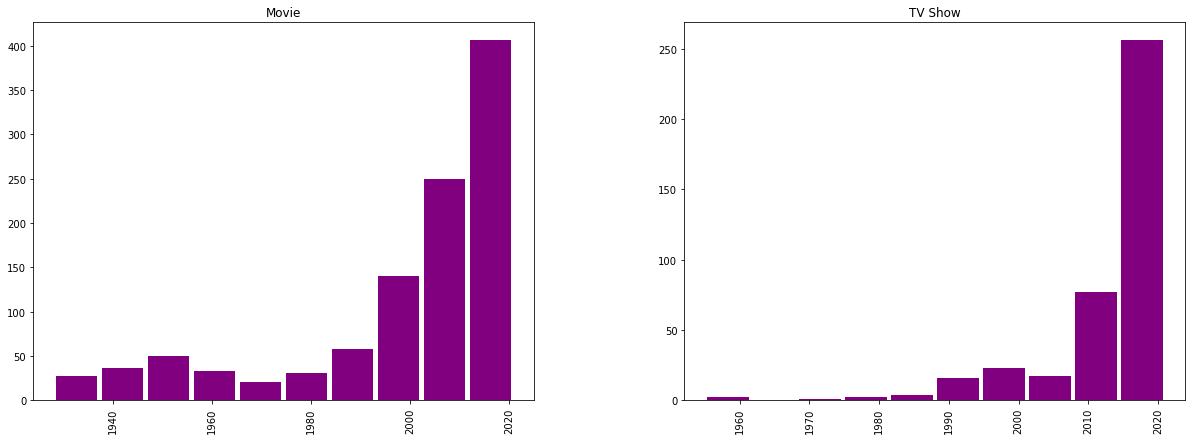

In [18]:
# использую метод hist для датасета
data.hist(column='release_year', by='type', bins= 10, rwidth=0.9 , figsize=(20,7),
 color='purple', sharex=False )

**Вывод:** По гистограмам можем увидеть, что больше всего фильмов вышло в период с 2010-2020 года. При этом увеличение прироста фильмов шло достаточно плавно на протяжении последних 40 лет. Чего нельзя сказать про ТВ-шоу, они практически не снимались, потом возник резкий скачок в 2010-х, а далее еще один супер резкий скачок по количеству ТВшоу произошел в промежутке с 2015-2020 года. Не замечала, что ТВшоу для детей в последнее время стали настолько актуальны.

In [19]:
# так же ищем и подсчитываем уникальные значения, но и пропуски хочу здесь тоже видеть, поэтому добавляем dropna=False
data['rating'].value_counts(dropna=False)

TV-G        318
TV-PG       301
G           253
PG          236
TV-Y7       131
TV-14        79
PG-13        66
TV-Y         50
TV-Y7-FV     13
NaN           3
Name: rating, dtype: int64

**Вывод:** Трудно как-то интерпертировать такой рейтинг, поэтому я решила, что лучше перекатегорирую американский рейтинг в более понятный для меня числовой, относительно возраста. Получается пять категорий 0+, 7+, 13+, 16+, 18+. Также добавим единые категории для обоих типов медиаформата.

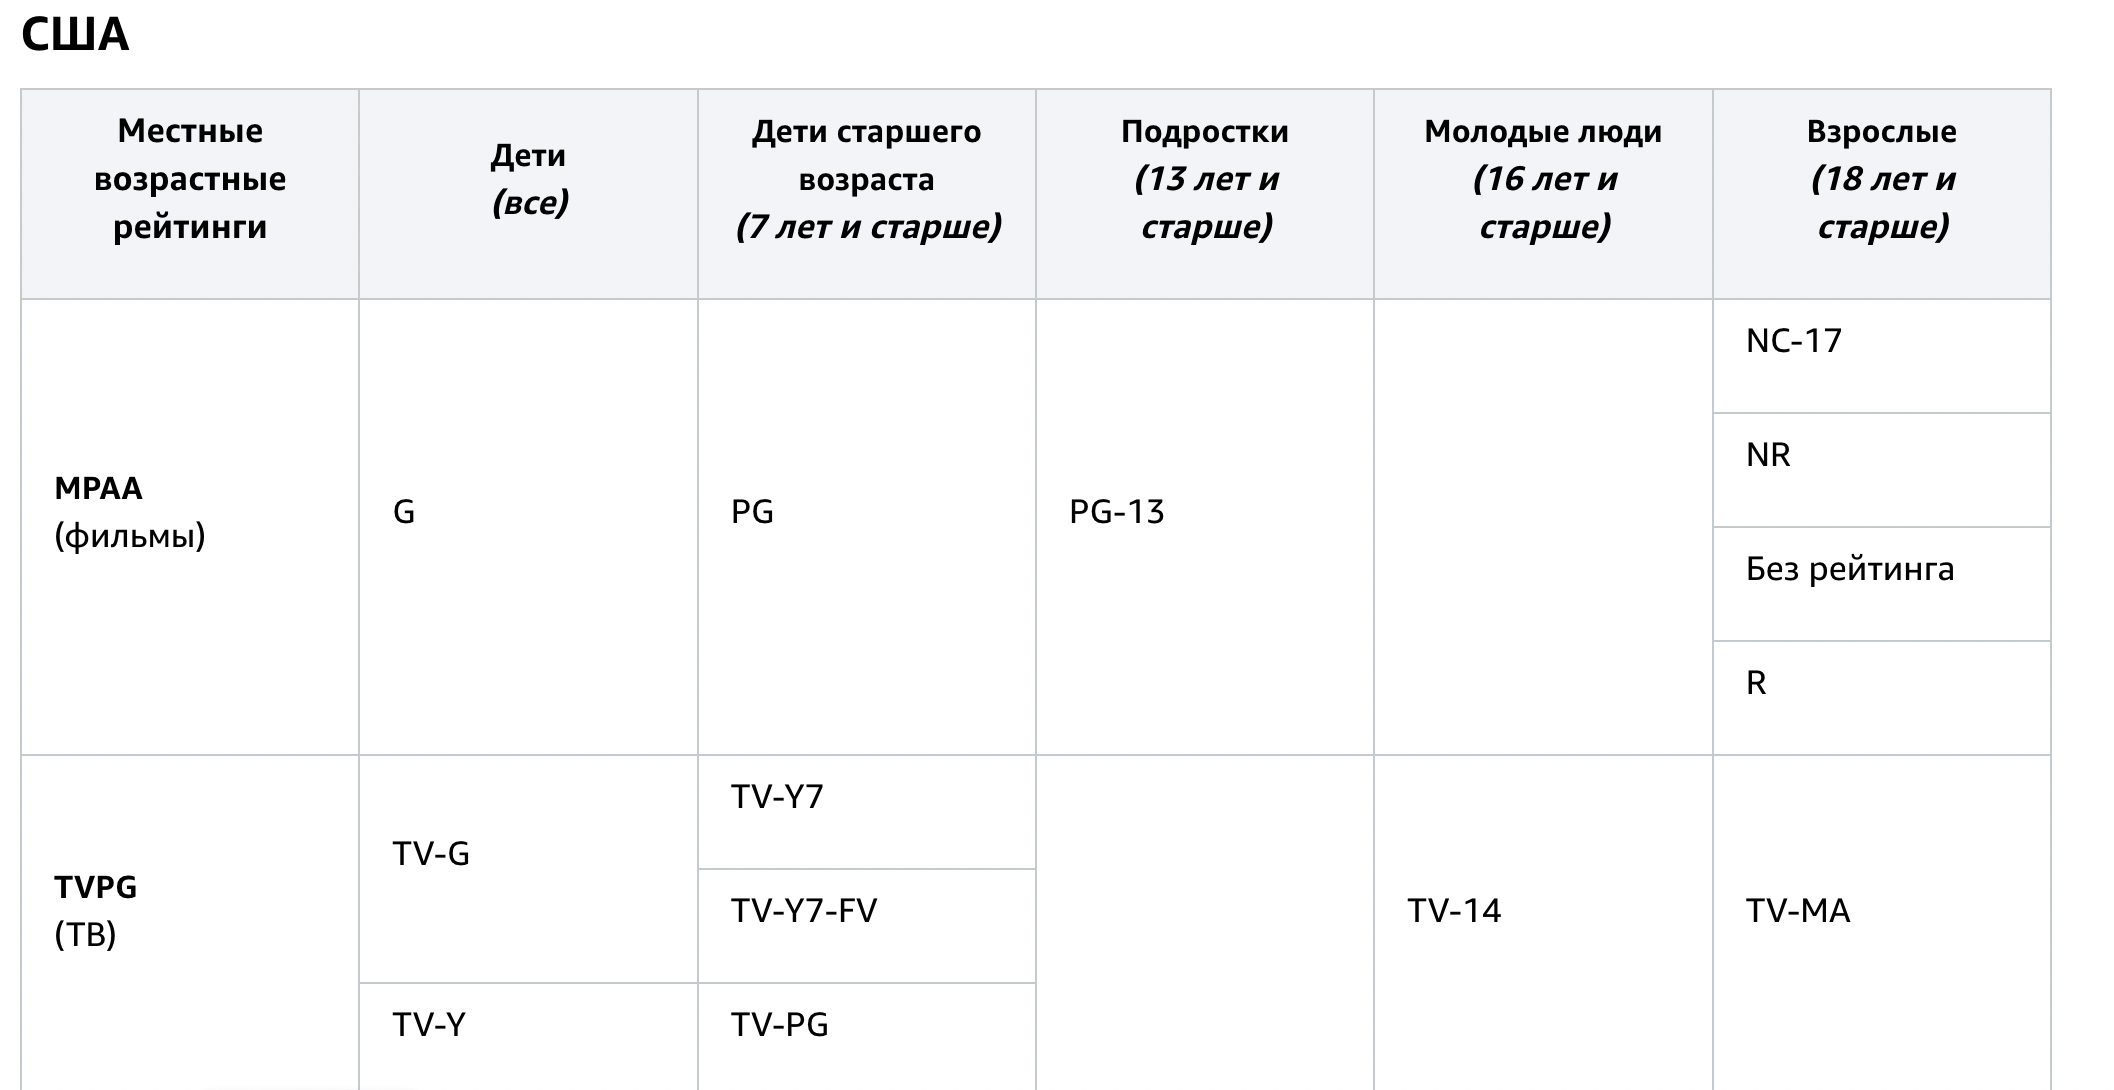

Для этого создадим функцию new_rating, которая будет перекатегорировать значения по таблице, приведенной выше. И применю эту функцию к столбцу rating с заменой.

In [20]:
# объявили собственную функцию
def new_rating(a):
    if a == 'G' or a == 'TV-G' or a =='TV-Y':
        return 0
    elif a == 'PG' or a == 'TV-Y7' or a == 'TV-Y7-FV' or a == 'TV-PG':
        return 7
    elif a == 'PG-13':
        return 13
    elif a == 'TV-14':
        return 16
    else:
        return -1

# применяем ее к колонке с рейтингом и вновь выводим частотные значения
data['rating'] = data['rating'].apply(new_rating)
data['rating'].value_counts()

 7     681
 0     621
 16     79
 13     66
-1       3
Name: rating, dtype: int64

Это Диснеевский канал, в целом, логично, по какой причине здесь не оказалось фильмов/ТВшоу с рейтингом 18+ по эквивалентной американской системе ранжирования.

Также интересно посмотреть распределение по возратсному рейтингу у фильмов и ТВ-шоу.

<AxesSubplot:xlabel='type'>

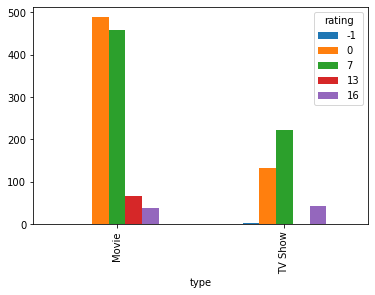

In [21]:
#  группирую данные по типу медиаформата и для каждого считаю частотные значения, переиндексирую полученную таблицу и строю гистограму
data_movie_rating = data.groupby(['type'])['rating'].value_counts().unstack()
data_movie_rating.plot(kind='bar')

**Вывод:** Видим, что и в категориях фильмы и ТВ-шоу преобладают медиа с возрастными ограничениями от 0+ и от 7+. Фильмов с возрастным ограничением 0+ все же немного больше, чем 7+.

Далее разделим датасет на фильмы и ТВ-шоу, точнее создадим новые по заданному принципу и построим гистограммы распределения количества фильмов по годам, в зависимости от возрастных ограничений.

array([[<AxesSubplot:title={'center':'-1'}>,
        <AxesSubplot:title={'center':'0'}>],
       [<AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'13'}>],
       [<AxesSubplot:title={'center':'16'}>, <AxesSubplot:>]],
      dtype=object)

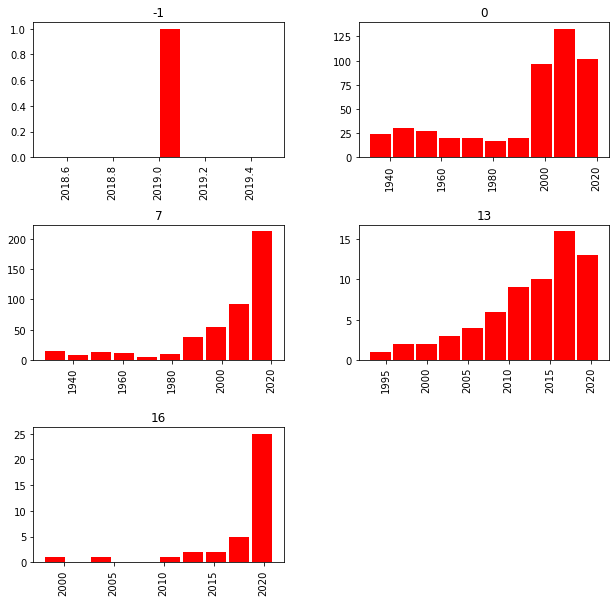

In [22]:
# выделяю новый датафрейм, где значение type только Movie
# Затем группирую по дате релиза и нахожу частотные значения, реиндексирую
# строю гистограммы, отдельно для каждого возрастного ограничения
data_movie = data[data['type'] == 'Movie']
data_movie.groupby('release_year')['rating'].value_counts().unstack()
data_movie.hist(column='release_year', by='rating', rwidth=0.9 , figsize=(10,10), color='red', sharex=False )

**Вывод:** Из полученных гистограм можно сказать, что как будто бы ничего критического не наблюдается, однако, можно отметить следующие аспекты:
- больше всего фильмов категории 0+ в промежутке с 2000-2010 было выпущено больше всего. Возможно это как-то связано с тем, что примерно с 2010х появился "хайп" на ТВшоу;
- количество фильмов категории 7+ стабильно растёт;
- по количеству фильмов 13+ наблюдается такая же тенденция, что и у 0+. Примерно в том же промежутке с 2015-2017гг было снято больше всего фильмов;
- категория фильмов 16+ максимально приобрела свой "успех" по количеству ближе к 2020ым годам, что является тоже интересным наблюдением.

Теперь сделаем то же самое и для ТВшоу.

array([[<AxesSubplot:title={'center':'-1'}>,
        <AxesSubplot:title={'center':'0'}>],
       [<AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'16'}>]], dtype=object)

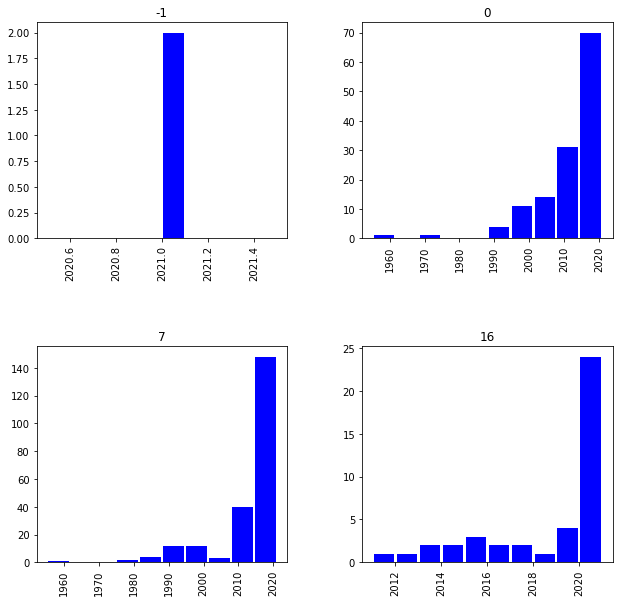

In [23]:
# делаю тоже самое что и выше, только для твшоу
data_tvshows = data[data['type'] == 'TV Show']
data_tvshows.groupby('release_year')['rating'].value_counts().unstack()
data_tvshows.hist(column='release_year', by='rating', rwidth=0.9 , figsize=(10,10), color='blue', sharex=False )

**Вывод:** Здесь в целом картина очевидная, потому что ранее мы уже наблюдали, что ТВ-шоу резко приобрели свою суперпопулярность примерно с 2010-2015-х годов. Но вот что можно отметить:
- у ТВ-шоу категория 13+ отсутствует, интересный факт;
- В категориях 0+, 7+ промежуток 2015-2020 - явный лидер по количеству шоу.

In [24]:
# ищу частотное распределение по продолжительности
data['duration'].value_counts()

1 Season     219
2 Seasons     82
3 Seasons     45
44 min        42
7 min         42
            ... 
120 min        1
56 min         1
19 min         1
30 min         1
68 min         1
Name: duration, Length: 158, dtype: int64

С продолжительностью тоже есть нюанс. Думаю можно также попробовать перекатегорировать значения. Для фильмов выделить 3-4 категории, например, фильмы до 30 минут, до часу включительно, до двух часов включительно и более двух часов. А для ТВ-шоу просто выделить количество сезонов, целое значение.

In [25]:
#  создаю собственную функцию для перекатегорирования продолжителности фильмов и ТВшоу
def new_dur(a):
    if 'min' in a:
        a = a.split()
        k = int(a[0])
        if k <= 30:
            return 30
        elif 30 < k <= 60:
            return 60
        elif 60 < k <= 120:
            return 120
        elif k > 120:
            return 1000
    elif 'Season' in a:
        a = a.split()
        return int(a[0])

#  применяю к колонке и создаю новую с новыми значниями
data['new_duration'] = data['duration'].apply(new_dur)
# группирую и смотрю частотные значения по продолжительности в зависимсти от типо медиаформата
data.groupby('type')['new_duration'].value_counts()

type     new_duration
Movie    120             591
         30              231
         60              138
         1000             92
TV Show  1               219
         2                82
         3                45
         4                24
         5                11
         7                 5
         6                 3
         8                 2
         9                 2
         10                2
         16                1
         19                1
         32                1
Name: new_duration, dtype: int64

**Исходя из полученных частотных значений можно сказать следующее:**

Относительно фильмов:
-Больше всего фильмов с продолжительностю с часу до двух;
-2 и 3 место по количеству фильмов между собой разделяют фильмы с продолжительностью до 30 минут и фильмы с продолжительностью от 30 до 60 минут соотвественно.

Относительно ТВ-шоу:
-Судя по частотным значениям наблюдается очень маленький процент шоу, которые продолжают более 1 сезона. Соответственно, несомненный лидер по количеству сезонов- это ТВшоу с 1 сезоном, далее по убыванию, соотвественно, 2хсезонные ТВ-шоу, 3хсезонные и так далее.


In [26]:
data['listed_in'].value_counts()

Animation, Comedy, Family                        124
Action-Adventure, Animation, Comedy               77
Action-Adventure, Animation, Kids                 45
Action-Adventure, Animation, Family               40
Animals & Nature, Documentary, Family             40
                                                ... 
Animals & Nature, Family, Reality                  1
Dance, Music, Musical                              1
Comedy, Family, Lifestyle                          1
Buddy, Docuseries                                  1
Action-Adventure, Animals & Nature, Animation      1
Name: listed_in, Length: 329, dtype: int64

**Вывод:**  Данная категория не требует каких-либо корректировок.

### Создание новых колонок

Хочу создать новые колонки: с одним жанром, с одним актером. Судя по всему, жанры и каст для каждого фильма/ТВшоу отсортированы по алфавиту. Поэтому создание новых столбцов с 1 жанром и с 1 актером не будут носить характер "колонка с основным жанром" и "колонка с основным актером". Это необходимо для того, чтобы посмотреть есть ли какие-то взаимосвязи или другие интересные наблюдения, как например, зависимость продолжительности по времени от актерского состава или жанра и так далее.

In [27]:
# создам две новые колонки, используя лямбда функцию
# с жанрами проще, там нет пропусков, поэтому просто вытаскиваем из каждого значения первый элемент, 
#                                                                       предварительно разбив его на список
data['genre'] = data['listed_in'].apply(lambda x: x.split(', ')[0])
# тут чуть сложнее: нужно устроить проверку если пропуск то пусть вернется более человеческое значение, 
#                                                       если нет то тоже первый элемент как и в функции выше
data['actor'] = data['cast'].apply(lambda x: 'Нет актёра' if pd.isna(x) else x.split(', ')[0])

# Проверка
display(data['actor'].value_counts().head(15))
display(data['genre'].value_counts().head(15))

Нет актёра              190
Walt Disney              15
Larry the Cable Guy      12
Tony Hale                11
Tom Hanks                10
Winston Hibler           10
Jim Cummings              9
Tom Kane                  7
Robert Downey Jr.         7
Dan Nachtrab              7
Dee Baker                 6
Pinto Colvig              6
Dean Jones                6
Johnny Depp               6
Russell Boulter           6
Name: actor, dtype: int64

Action-Adventure    452
Animation           320
Comedy              193
Animals & Nature    173
Documentary          65
Coming of Age        56
Biographical         35
Docuseries           33
Drama                27
Buddy                20
Family               20
Anthology            12
Fantasy               8
Concert Film          7
Reality               4
Name: genre, dtype: int64

**Вывод:**  В обеих колонках немного изменились "ТОП-5", в целом, было ожидаемо, дальше уже будем думать, что с ними делать.

## Исследования

Проверим, есть ли: 
- Зависимость между категорией и продолжительностью;
- Зависимость между годом и средней продолжительностью;
- Зависимость между категорией и годом;
- Зависимость между годом и средней продолжительностью фильмов. В детстве и подростковом возрасте помню часто возмущалась, что фильмы короткие, и только в последние годы стала замечать, что современные фильмы мультфильмы стали более длительными. Проверю есть ли такая тенденция;
- Зависимость между годом и средним количеством сезонов ТВшоу;
- Зависимость между категорией и годом для фильмов;
- Зависимость между категорией и годом для ТВшоу.

In [28]:
data_only_movie = data[data['type'] == 'Movie']
data_only_tvshows = data[data['type'] == 'TV Show']

### Зависимость между режиссером и длиной фильма/ТВшоу

Возьмем первых топ 5 режиссеров и посмотрим, есть ли зависимость между длиной фильма/ТВшоу.

In [29]:
data['director'].value_counts().head(15)

Jack Hannah         17
John Lasseter       16
Paul Hoen           16
Robert Stevenson    12
Charles Nichols     12
Vincent McEveety    10
Bob Peterson        10
James Algar          9
Kenny Ortega         9
Wilfred Jackson      9
Norman Tokar         8
Robert Vince         8
Stuart Gillard       8
Duwayne Dunham       8
Jack Kinney          7
Name: director, dtype: int64

### Зависимость между годом и средней продолжительностью фильмов

In [30]:
# Вспомним какие у нас есть значения по новой категории
data_only_movie['new_duration'].value_counts()

120     591
30      231
60      138
1000     92
Name: new_duration, dtype: int64

Так как киномотограф "не затихал" почти ни в один год, то распределение по годам получится, скорее всего, слишком нечитабельным, поэтому я создам снова новую функцию, где разобью на произвольные временные периоды колонку с релизом фильмов и функцию, которая вытащит точные целые значения продолжительности фильмов в минутах.

In [31]:
# Все фильмы до 50го года объединю вместе, далее 50-70гг и потом +10 к каждому периоду
def to_period(a):
    if a < 1950:
        return 1950
    elif a < 1970:
        return 1970
    elif a < 1980:
        return 1980
    elif a < 1990:
        return 1990
    elif a < 2000:
        return 2000
    elif a < 2010:
        return 2010
    elif a < 2022:
        return 2022

# отдельно сохраню функцию для моды
moda = lambda x: x.value_counts().index[0]
# применю периодизацию к новому столбцу 
data_only_movie['period'] = data['release_year'].apply(to_period)
# Создам новую функцию и применю ее для создания продолжительности фильмов в исходных минутах
data_only_movie['dur_min'] = data_only_movie['duration'].apply(lambda a: int(a.split()[0]))

Посмотрим на диаграмму размаха по продолжительности фильмов в минутах. Может у нас есть какие-то подозрительные значения, которые стоит отбросить. Для этого найдем и выведем диаграмму размаха, потом посчитаем межквартильный размах и диапазон допустимых значений, [Q1-1.5IRT;Q3+1.5IRT].

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8e20a376a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8e20a37d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8e20a373d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8e31c0b220>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8e31c0b4f0>],
 'means': []}

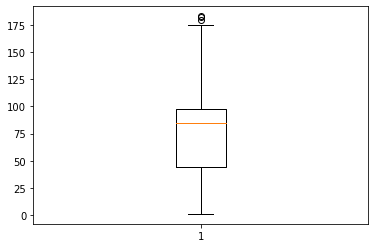

In [32]:
# СТроим диагрмамму размаха по колонке dur_min
plt.boxplot(x=data_only_movie['dur_min'])

На первый взгляд не так много значений выходит за "усы". Посчитаем их точное количество.

In [33]:
# Сначала увидем значения мин, мах и квартилей
display(data_only_movie['dur_min'].describe())
# рассчитаем межквартильный размах
irt = data_only_movie['dur_min'].describe()['75%'] - data_only_movie['dur_min'].describe()['25%']
# найдем границы [Q1-1.5IRT;Q3+1.5IRT]
a = data_only_movie['dur_min'].describe()['25%'] - 1.5 * irt
b = data_only_movie['dur_min'].describe()['75%'] + 1.5 * irt
display(a, b)

count    1052.000000
mean       71.910646
std        40.595585
min         1.000000
25%        44.000000
50%        85.000000
75%        98.000000
max       183.000000
Name: dur_min, dtype: float64

-37.0

179.0

Получается, что наш доверительный интервал от -37 до 179. Так как продолжительности отрицательной быть не может, то будем считать, что нам нужны значения от 0 до 179.

In [34]:
# посчитаем первоначальное количество значений
display(data_only_movie['dur_min'].count())
# посчитаем новое количество значений в диапозоне от 0 до 179
display(data_only_movie[data_only_movie['dur_min'] <= 179]['dur_min'].count())
display(data_only_movie[data_only_movie['dur_min'] > 179]['dur_min'])

1052

1049

330     180
333     182
1039    183
Name: dur_min, dtype: int64

По итогу только 3 значения выходят за наш рассчитанный диапозон, и то на немного, поэтому думаю можно этим пренебречь и искать зависимость вместе с этими значениями.

,mean,median,<lambda_0>
period,,,
1950,18.269231,8.0,8
1970,69.844156,77.0,7
1980,89.969697,93.0,94
1990,76.829268,91.0,46
2000,93.055046,93.0,90
2010,85.567901,89.0,88
2022,67.498938,77.0,44


<AxesSubplot:xlabel='period'>

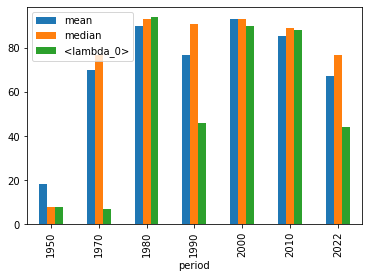

In [35]:
# Сгруппирую данные по временным периодам и рассчитаю среднее, медиану и моду для продолжительности
display(data_only_movie.groupby('period')['dur_min'].agg(['mean', 'median', moda]))
# построю столбчатую диаграмму
data_only_movie.groupby('period')['dur_min'].agg(['mean', 'median', moda]).plot(kind='bar')

**Вывод:** Можно заметить, что продолжительность фильмов стала падать, интересно с чем бы это могло быть связано. Но и при этом мы можем видеть, какие короткие фильмы были до 1970х, и потом как произошел какой-то резкий киномотографический бум в США в плане продолжительности фильмов. В 1980х мода выше среднего и медианы. В 1980-1990 наоборот было много коротких фильмов, исходя из значений среднего и моды.

Исходя из гистограмм, можно предположить, что прямой зависимости между годом выхода и продолжительностю фильмов - нет, по крайней мере если рассматривать весь промежуток времени. Но дополнительно, чтобы убедиться в этом, взглянем насколько эти 2 величины коррелируют друг с другом.

<AxesSubplot:xlabel='release_year', ylabel='dur_min'>

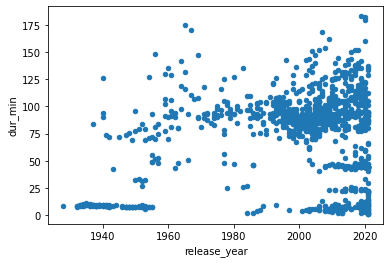

In [36]:
# Построим график типа scatter, чтобы точечно увидеть распределение  пересечений год-продолжительность
data_only_movie.plot('release_year','dur_min', kind='scatter')

In [37]:
# Рассчитаем сам коэффициент корреляции
data_only_movie['release_year'].corr(data_only_movie['dur_min'])

0.20907494477985053

**Вывод:** Как и предполагалось, здесь нет явной линейной зависимости, зато мы можем по графику увидеть, насколько увеличилось разнообразие по продолжительности фильмов за последние 20 лет. И, скорее всего, даже статистически бессмысленно было коррелировать эти два значения.

### Зависимость между годом и средним количеством сезонов ТВшоу

Проделаем теперь ту же работу для ТВшоу.

,mean,median,<lambda_0>
period,,,
1970,1.000000,1.0,1
1980,4.000000,5.0,6
1990,7.125000,3.0,2
2000,2.413793,2.0,1
2010,2.794118,2.0,2
2022,1.885093,1.0,1


<AxesSubplot:xlabel='period'>

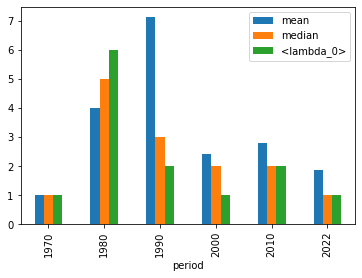

In [38]:
data_only_tvshows['period'] = data['release_year'].apply(to_period)
# Повторю те же действия, что и в эксперименте выше но для ТВшоу
display(data_only_tvshows.groupby('period')['new_duration'].agg(['mean', 'median', moda]))
data_only_tvshows.groupby('period')['new_duration'].agg(['mean', 'median', moda]).plot(kind='bar')

**Вывод:** Было огромное количество сезонов у ТВшоу в промежутке между 1970-1990гг, но затем это количество резко упало и больше нет тенденции возрастания. За последние 12 лет, чаще всего и подавляющее большинство ТВшоу идут только 1 сезон, но бывают случаи, когда в среднем ТВ-шоу длятся и до 2 сезонов.

### Зависимость между категорией и годом для фильмов

Теперь посмотрим, как изменялся кинематограф по годам в плане жанров.

In [39]:
# Вспомним, какие у нас топ жанры есть
data_only_movie['genre'].value_counts()

Action-Adventure    314
Animation           259
Comedy              144
Animals & Nature    105
Documentary          65
Coming of Age        50
Biographical         35
Drama                25
Buddy                13
Family               11
Concert Film          7
Fantasy               6
Movies                3
Crime                 3
Anthology             2
Historical            2
Science Fiction       2
Musical               2
Variety               1
Dance                 1
Lifestyle             1
Sports                1
Name: genre, dtype: int64

genre,Action-Adventure,Animals & Nature,Animation,Comedy,Documentary
period,,,,,
1950,5.0,NaN,73.0,NaN,NaN
1970,18.0,18.0,20.0,6.0,5.0
1980,14.0,6.0,2.0,10.0,NaN
1990,21.0,NaN,7.0,6.0,NaN
2000,45.0,1.0,9.0,34.0,NaN
2010,81.0,9.0,50.0,53.0,7.0
2022,130.0,71.0,98.0,35.0,53.0


<AxesSubplot:xlabel='period'>

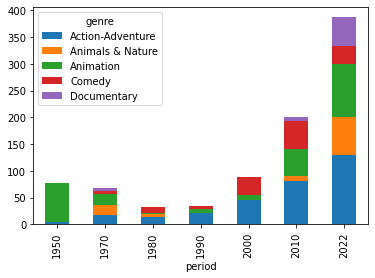

In [40]:
# выделим 5 самых распространенных жанров в отдельный датафрейм
data_only_movie_genre5 = data_only_movie[(data_only_movie['genre'] == 'Action-Adventure') |
                                        (data_only_movie['genre'] == 'Animation') |
                                        (data_only_movie['genre'] == 'Comedy') |
                                        (data_only_movie['genre'] == 'Animals & Nature') |
                                        (data_only_movie['genre'] == 'Documentary')]
# сгруппируем по периоду так же и определим еще раз частотные значения по жанрам из топ5
display(data_only_movie_genre5.groupby('period')['genre'].value_counts().unstack())
# выведим график слегка по другому, чтобы нагляднее увидеть, как изменились тренды на жанры количественно относительно других
data_only_movie_genre5.groupby('period')['genre'].value_counts().unstack().plot(kind='bar', stacked=True)

**Вывод:** Интересно наблюдать следующие моменты: 
-до 1950х были только анимационные фильмы и при том только короткометражки (если вспомнить диаграму выше); 
-в период от 1990-2010 много комедийных фильмов стало появляться, а в период с 2010-2022 резко меньше; 
-также набрали "тренд" приключенческие фильмы, документальные и фильмы про животных и природу. 
-в целом, в реальном мире можно наблюдать тенденции повышения интересов к фильмам, связанных с историческими фактами, биографией, а также тренд на "гринпис", сохранение природы.

### Зависимость между категорией и годом для ТВшоу

Проделаем те же действия и посмотрим на результат.

In [41]:
data_only_tvshows['genre'].value_counts().head()

Action-Adventure    138
Animals & Nature     68
Animation            61
Comedy               49
Docuseries           33
Name: genre, dtype: int64

У ТВ-шоу преобладают такие же жанры. Единственная разница- это вместо Documentary появляется Docuseries. Заменим и проанализируем.

genre,Action-Adventure,Animals & Nature,Animation,Comedy,Docuseries
period,,,,,
1980,1.0,1.0,NaN,1.0,NaN
1990,5.0,NaN,2.0,1.0,NaN
2000,16.0,NaN,7.0,3.0,NaN
2010,14.0,1.0,7.0,10.0,NaN
2022,102.0,66.0,45.0,34.0,33.0


<AxesSubplot:xlabel='period'>

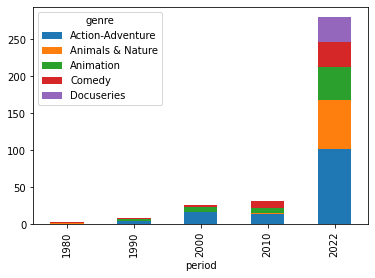

In [42]:
# выделим 5 самых распространенных жанров в отдельный датафрейм
data_only_tvshows_genre5 = data_only_tvshows[(data_only_tvshows['genre'] == 'Action-Adventure') |
                                        (data_only_tvshows['genre'] == 'Animation') |
                                        (data_only_tvshows['genre'] == 'Comedy') |
                                        (data_only_tvshows['genre'] == 'Animals & Nature') |
                                        (data_only_tvshows['genre'] == 'Docuseries')]
# сгруппируем по периоду так же и определим еще раз частотные значения по жанрам из топ5
display(data_only_tvshows_genre5.groupby('period')['genre'].value_counts().unstack())
# выведим график слегка по другому, чтобы нагляднее увидеть, как изменились тренды на жанры количественно относительно других
data_only_tvshows_genre5.groupby('period')['genre'].value_counts().unstack().plot(kind='bar', stacked=True)

**Вывод:** Здесь можем наблюдать похожую тенденцию, как за последние 12 лет увеличился контент, связанный с природой, животными. Фильмы-приключения увеличились еще более значительно, а также подросли комедии и анимационные шоу.

### Зависимость/соотношения между категориями и  продолжительностью фильмов

Сначала посмотрим, как менялось соотношение наших топ 5 жанров по временным периодам.

<AxesSubplot:xlabel='period'>

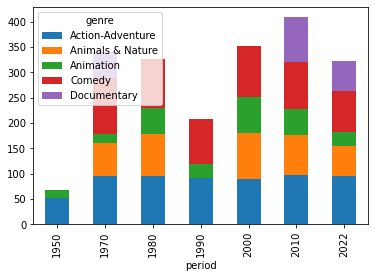

In [43]:
data_only_movie_genre5.groupby(['period','genre'])['dur_min'].mean().unstack().plot(kind='bar', stacked=True)

Приключенческий жанр уверенно занял свою позицию в топе среди всех жанров по всем периодам. Комедии относительно тоже стабильно держатся. Но про природу и животных стали немного меньше снимать, как и анимационные фильмы.

Построим соотношение каждого жанра из нашего топ 5 по средней продолжительности фильмов за период 2010-2022гг.

<AxesSubplot:title={'center':'Соотношение каждого жанра из топ 5 по средней продолжительности 2010-2022'}, ylabel='dur_min'>

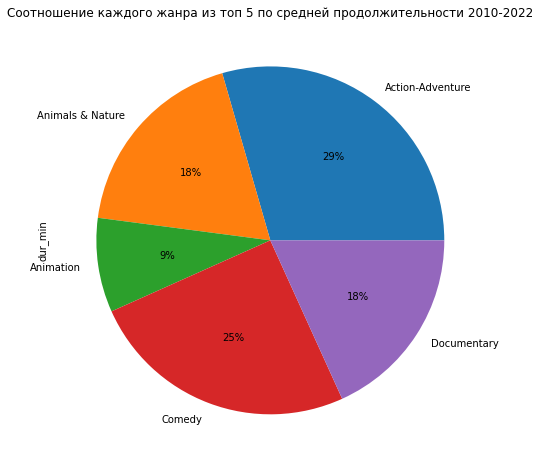

In [44]:
# Используем новый тип pie
# сначала отсортируем период 2022, затем группируем по жанрам и рассчитываем среднюю продолжительность, строим график 
data_only_movie_genre5[data_only_movie_genre5['period'] == 2022].groupby('genre')['dur_min'].mean().plot(
    kind='pie', # тип графика
    figsize=(12,8), # размер графика
    autopct='%1.0f%%', # разметка процентов
    title='Соотношение каждого жанра из топ 5 по средней продолжительности 2010-2022') # название графика

Сделаем то же самое, но абсолютно для всех жанров за период 2010-2022.

<AxesSubplot:title={'center':'Соотношение по средней продолжительности по всем жанрам 2010-2022'}, ylabel='dur_min'>

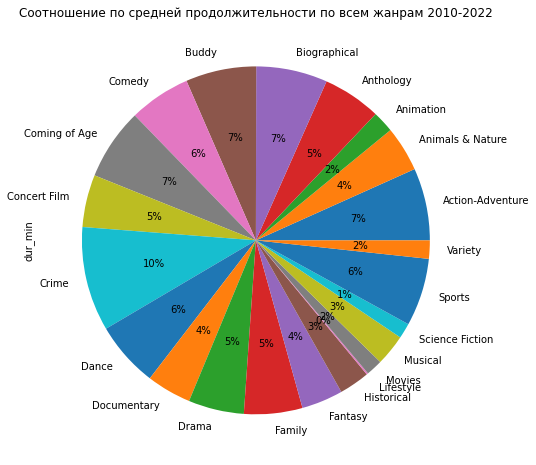

In [45]:
# Используем датасет более ранней версии и проделываем все тоже самое
data_only_movie[data_only_movie['period'] == 2022].groupby('genre')['dur_min'].mean().plot(
    kind='pie',
    figsize=(12,8),
    autopct='%1.0f%%',
    title='Соотношение по средней продолжительности по всем жанрам 2010-2022') # по умолчанию оранжевый

Здесь картина меняется немного, криминальные фильмы по продолжительности лидируют. Интересно, какой криминал может быть на детском канале, еще и на первом месте? 

Теперь посмотрим по количеству жанров за тот же период.

<AxesSubplot:title={'center':'Соотношение по количеству жанров за период 2010-2022'}, ylabel='title'>

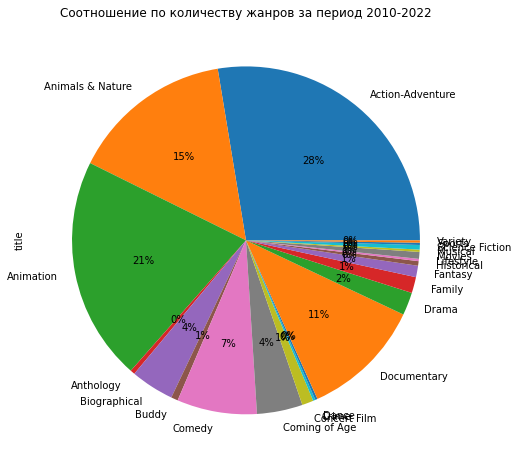

In [46]:
# берем тот же датасет, но считаем не среднее по продолжительности, а количество фильмов
# по сути здесь без разницы по какоой колонке считать, нам по сути только строки нужно посчитать
data_only_movie[data_only_movie['period'] == 2022].groupby('genre')['title'].count().plot(
    kind='pie',
    figsize=(12,8),
    autopct='%1.0f%%',
    title='Соотношение по количеству жанров за период 2010-2022') # по умолчанию оранжевый

В целом, то, что мы уже и определяли по частотной таблице, это наличие 5 явных лидеров. Как раз по ним мы и делали исследования, все правильно.

## Итоги

1. Изучили и применили знания статистики для анализа данных там, где это было возможно на данном датасете.
2. Средняя продолжительность фильмов стала падать, но и при этом ввиду увеличения количества фильмов возросло и разнообразие по длине фильмов. 
3. Уменьшилось среднее количество сезонов ТВшоу по сравнению с XX веком. Чаще всего все заканчивается на 1 сезоне.
4. Увеличилось разнообразие жанров фильмов, лидером уже много десятков лет является жанр - приключения, второе место стабильно держит анимационный жанр.
5. У ТВ-шоу лидирующий жанр тоже - приключения, но второе место занимает необычный жанр: животные и природа.
6. Лидером по средней продолжительности фильмов является жанр - криминал, но надо учитывать, что жанры рассматривались, как первый из общего списка. Но общая доля фильмов с жанром криминала - очень мала.